In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\Jeremy\OneDrive\Desktop\PROJECT\Cleaning and EDA\Nike_Sales_Uncleaned.csv")

# Displaying the first 5 rows
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


In [3]:
# Getting dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              1990 non-null   object 
 5   Units_Sold        1265 non-null   float64
 6   MRP               1246 non-null   float64
 7   Discount_Applied  832 non-null    float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB


# Insights
- The dataset contains information about various Nike products, including their names, prices, ratings, and review counts.

- There are 13 columns in the dataset with a maximum entry count of 2500
- Some columns have missing values

In [4]:
# Getting statistical summary
df.describe()

,Order_ID,Units_Sold,MRP,Discount_Applied,Revenue,Profit
count,2500.000000,1265.000000,1246.000000,832.000000,2500.000000,2500.000000
mean,3194.352400,1.482213,6039.863395,0.631022,274.873716,1376.012848
std,749.972638,1.696947,2315.746826,0.365500,2023.773550,1478.671013
min,2000.000000,-1.000000,2006.630000,0.000000,-7561.590000,-1199.450000
25%,2534.750000,0.000000,4038.902500,0.320000,0.000000,93.532500
50%,3192.500000,2.000000,6110.030000,0.615000,0.000000,1371.385000
75%,3841.250000,3.000000,8022.187500,0.962500,0.000000,2660.645000
max,4499.000000,4.000000,9996.220000,1.250000,37169.350000,3999.210000


## DATA CLEANING 

In [5]:
# Size
print(f"Before replacement: {df['Size'].value_counts(dropna= False)}")

# Step 1 - Making sure all the values are either (S, M, L, XL)

# To replace the size with appropriate size category
# NOTE: The sizes in the dataset are in string format

# Mapping sizes to size categories
kids_size_map = {'6': 'S', '7': 'S', '8': 'M', '9': 'M', '10': 'L', '11': 'L', '12': 'XL'}
women_size_map = {'6': 'S', '7': 'S', '8': 'M', '9': 'M', '10': 'L', '11': 'L', '12': 'XL'}
men_size_map = {'6': 'M', '7': 'M', '8': 'M', '9': 'M', '10': 'L', '11': 'XL', '12': 'XL'}

# Replacing sizes based on Gender_Category. This is because sizes differ for kids, women and men
df.loc[df["Gender_Category"]== "Kids", "Size"] = df.loc[df["Gender_Category"]== "Kids", "Size"].replace(kids_size_map)
df.loc[df["Gender_Category"]== "Women", "Size"] = df.loc[df["Gender_Category"]== "Women", "Size"].replace(women_size_map)
df.loc[df["Gender_Category"]== "Men", "Size"] = df.loc[df["Gender_Category"]== "Men", "Size"].replace(men_size_map)

print(f"After replacement: {df['Size'].value_counts(dropna= False)}")


Before replacement: Size
L      513
XL     512
NaN    510
M      478
7       86
11      77
10      76
9       68
12      61
8       60
6       59
Name: count, dtype: int64
After replacement: Size
M      654
L      644
XL     595
NaN    510
S       97
Name: count, dtype: int64


In [6]:
df["Gender_Category"].value_counts() # Categorical data type

Gender_Category
Kids     841
Men      840
Women    819
Name: count, dtype: int64

In [7]:
df["Product_Line"].value_counts() # Categorical data type

Product_Line
Training      546
Basketball    507
Lifestyle     501
Running       474
Soccer        472
Name: count, dtype: int64

In [8]:
df["Sales_Channel"].value_counts() # Categorical data type

Sales_Channel
Online    1255
Retail    1245
Name: count, dtype: int64

In [9]:
print(f'Before changes {df["Region"].value_counts()}') 

# Replacing inconsistent city names in 'Region' column
replace_cities = {'bengaluru': 'Bangalore', 'hyderbad': 'Hyderabad', 'Hyd': 'Hyderabad'}
df['Region'] = df['Region'].replace(replace_cities)

# Checking the changes
print()
print(f'After changes {df["Region"].value_counts()}')

Before changes Region
Delhi        438
Mumbai       418
Kolkata      417
Pune         388
bengaluru    220
Bangalore    216
hyderbad     141
Hyd          136
Hyderabad    126
Name: count, dtype: int64

After changes Region
Delhi        438
Bangalore    436
Mumbai       418
Kolkata      417
Hyderabad    403
Pune         388
Name: count, dtype: int64


In [10]:
# Changing the data types of some columns to categorical data type
cat_columns = ["Gender_Category", "Size", "Sales_Channel", "Region", "Product_Line"]

df[cat_columns] = df[cat_columns].astype('category')

In [11]:
# Changing the 'Order_Date' column to datetime data type
df["Order_Date"] = pd.to_datetime(df["Order_Date"],format='mixed')


1. # Missing Values

In [12]:
# Checking for missing values
df.isnull().sum()/2500 * 100  # Percentage of missing values

Order_ID             0.00
Gender_Category      0.00
Product_Line         0.00
Product_Name         0.00
Size                20.40
Units_Sold          49.40
MRP                 50.16
Discount_Applied    66.72
Revenue              0.00
Order_Date          24.64
Sales_Channel        0.00
Region               0.00
Profit               0.00
dtype: float64

### Missing Values Analysis
- The columns with missing data are:
    - Size (20%)
    - Units_sold (49%)
    - MRP (50%)
    - Discount_Applied (66%)
    - Order_Date (25%)


### Next Steps
- Use imputation techniques to fill in missing values:
    - For numerical columns, consider using mean or median imputation.
    - For categorical columns, consider using mode imputation.
    - or consider dropping rows/columns with excessive missing values if they are not critical to the analysis.


In [13]:
# Dropping the Discount_Applied column
df.drop(columns= "Discount_Applied", inplace= True)

In [14]:
# For missing values in the "Size" column, they will be filled with the mode depending on the Gender
df.loc[df["Gender_Category"] == "Women", "Size"] = df.loc[df["Gender_Category"] == "Women", "Size"].fillna('L')
df.loc[df["Gender_Category"] == "Men", "Size"] = df.loc[df["Gender_Category"] == "Men", "Size"].fillna('M')
df.loc[df["Gender_Category"] == "Kids", "Size"] = df.loc[df["Gender_Category"] == "Kids", "Size"].fillna('L')

In [15]:
# Creating a new column "Year" from the "Order_Date"(Feature Selection)
df["Year"] = df["Order_Date"].dt.year
df["Year"].value_counts(dropna= False)

Year
2024.0    892
2025.0    874
NaN       616
2023.0    118
Name: count, dtype: int64

- Replacing the missing values with mode(2024)

In [16]:
df["Year"] = df["Year"].fillna(value= df["Year"].mode())
df["Year"].value_counts(dropna= False)

Year
2024.0    892
2025.0    874
NaN       616
2023.0    118
Name: count, dtype: int64

In [17]:
# Dropping the "Order_Date" because the "Year" column will replace it 
df.drop(columns= "Order_Date", inplace= True)

In [18]:
# Dropping the "Units_Sold" and "MRP" columns since they are of no importance
df.drop(columns= ["Units_Sold", "MRP"], inplace= True)

## Duplicates

In [19]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

- No duplicates present

# Categorical Analysis

In [20]:
# Selecting categorical columns and object columns
df.select_dtypes(include= ["category", "object"])

,Gender_Category,Product_Line,Product_Name,Size,Sales_Channel,Region
0,Kids,Training,SuperRep Go,M,Online,Bangalore
1,Women,Soccer,Tiempo Legend,M,Retail,Hyderabad
2,Women,Soccer,Premier III,M,Retail,Mumbai
3,Kids,Lifestyle,Blazer Mid,L,Online,Pune
4,Kids,Running,React Infinity,XL,Retail,Delhi
...,...,...,...,...,...,...
2495,Kids,Basketball,Kyrie Flytrap,XL,Online,Pune
2496,Men,Basketball,Kyrie Flytrap,L,Online,Hyderabad
2497,Men,Soccer,Tiempo Legend,M,Retail,Bangalore
2498,Women,Training,ZoomX Invincible,L,Online,Mumbai


In [21]:
# Renaniming the Profit column to "Price" 
df.rename(columns= {"Profit": "Price"}, inplace= True)

In [22]:
# Creating a column "Profit" to show if the product had profit('yes') or not ('no')
df["Profit"] = np.where(df["Price"] > 0, 'Yes', 'No')

<Axes: xlabel='Gender_Category', ylabel='Price'>

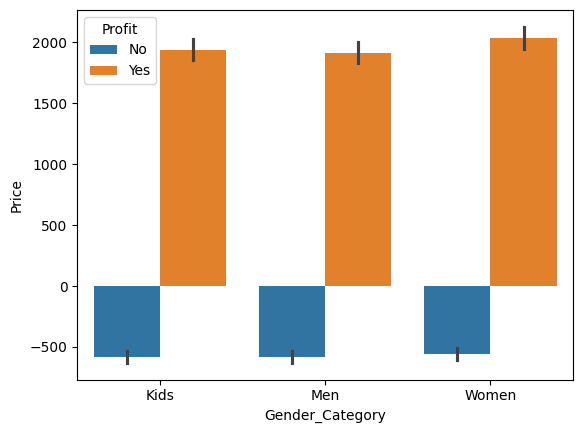

In [23]:
# Getting the realtion between "Gender_Category" column with "Price" column in respect to "Profit" column
sns.barplot(data= df,
            x= "Gender_Category",
            y= "Price",
            hue= "Profit")

<Axes: xlabel='Size', ylabel='Price'>

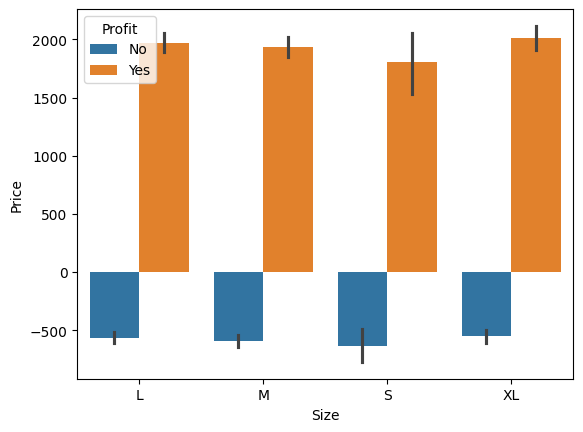

In [24]:
# Getting the realtion between "Size" column with "Price" column in respect to "Profit" column
sns.barplot(data= df,
            x= "Size",
            y= "Price",
            hue= "Profit")

<Axes: xlabel='Product_Line', ylabel='Price'>

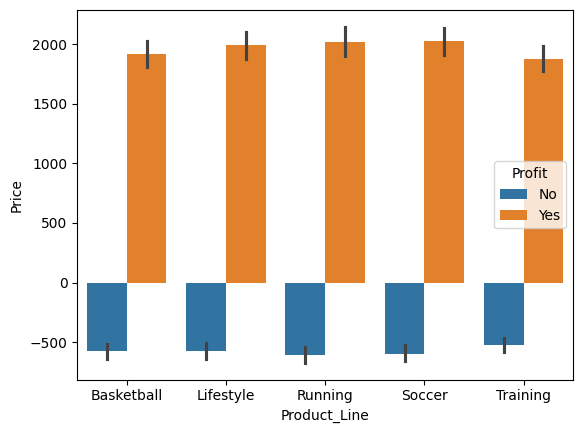

In [25]:
# Getting the realtion between "Product_Line" column with "Price" column in respect to "Profit" column
sns.barplot(data= df,
            x= "Product_Line",
            y= "Price",
            hue= "Profit"
           )

<Axes: xlabel='Sales_Channel', ylabel='Price'>

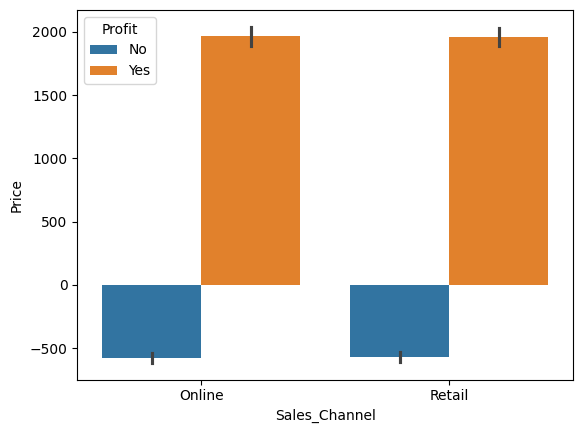

In [26]:
# Getting the realtion between "Sales_Channel" column with "Price" column in respect to "Profit" column
sns.barplot(data= df,
            x= "Sales_Channel",
            y= "Price",
            hue= "Profit"
           )

<Axes: xlabel='Region', ylabel='Price'>

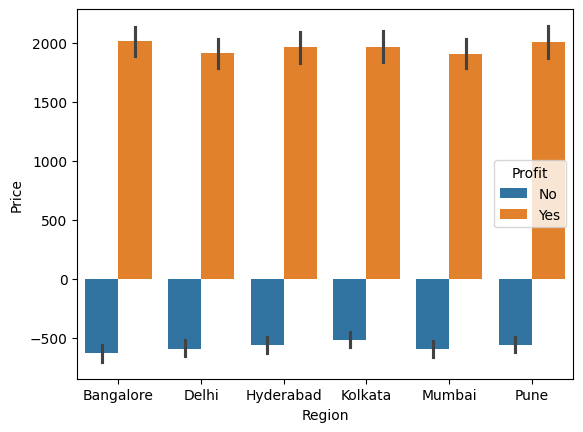

In [27]:
# Getting the realtion between "Region" column with "Price" column in respect to "Profit" column
sns.barplot(data= df,
            x= "Region",
            y= "Price",
            hue= "Profit"
           )

## REPORT
- From the analysis on the categorical columns these are the findings:
    1. The sales are almost similiar in all the columns indicating that the features does not affect the profits highly.
    2. The Profits are more towards the product than the losses.
    3. For the **shoe size**: The small(S) tend to perform poorly compared to the other sizes. This would be a result of low purchases but high number of manufactured products.
    4. For the **Product_Line**: Running and Soccer tend to have great profits but still hold the highest number of losses compared to others. This might be due to over production on certain shoe type that tends to have low purchases


# Numerical Analysis

<Axes: xlabel='Year', ylabel='Price'>

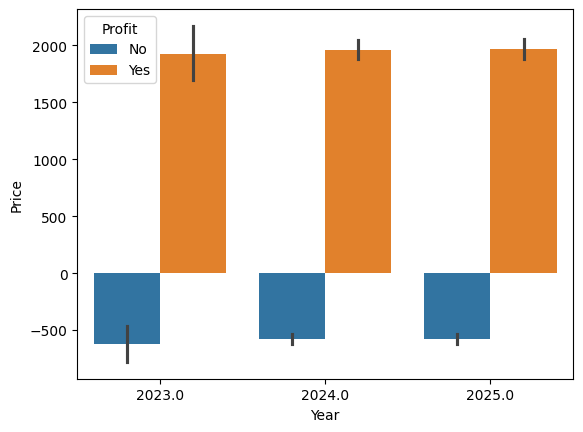

In [28]:
# Getting the realtion between "Year" column with "Price" column in respect to "Profit" column
sns.barplot(data= df, x= "Year", y= "Price", hue= "Profit")

## Report
- 2023 recorded highest number of sales with high number of profit and unfortunately highest number of losses.